<a href="https://colab.research.google.com/github/shaheerzubery/Deeplearning/blob/main/Underwater_dataSet_using_Multilayer_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
path = "/content/drive/MyDrive/Underwater refined data.csv"
Underwater_data = pd.read_csv(path,encoding= 'unicode_escape')
Underwater_data.head()

,ID,Latitude,Longitude,Temp (°C),Depth,Site
0,1,27.2706,48.331,24.448,12.0,0
1,2,27.2706,48.331,24.448,12.0,0
2,3,27.2706,48.331,24.545,12.0,0
3,4,27.2706,48.331,24.448,12.0,0
4,5,27.2706,48.331,24.351,12.0,0


In [2]:
Underwater_data.describe()

,ID,Latitude,Longitude,Temp (°C),Depth,Site
count,408638.000000,408638.000000,408638.000000,408634.000000,408638.000000,408638.000000
mean,204319.500000,27.385022,48.432279,20.759051,12.010513,3.750275
std,117963.773987,0.509617,0.096028,2.980158,6.177916,2.892726
min,1.000000,26.367900,48.331000,14.421000,5.000000,0.000000
25%,102160.250000,27.180400,48.385800,18.236000,5.000000,1.000000
50%,204319.500000,27.270600,48.408000,20.615000,12.000000,4.000000
75%,306478.750000,27.611100,48.522000,23.100000,12.000000,6.000000
max,408638.000000,28.446100,48.708700,29.252000,22.100000,8.000000


In [3]:
sample = Underwater_data.sample(10)
sample

Underwater_class = ['Ilha Deserta', 'Ilha da Galé', 'Ilha do Coral','Ilha dos Lobos','lha do Xavier','Moleques do Sul','Parcel da Pombinha','Parcel do Xavier (Alalunga)','Tamboretes']


## **Preprocess data**

In [4]:


from sklearn.model_selection import train_test_split

features = ['Latitude','Longitude','Temp (°C)','Depth']
label = 'Site'
x = Underwater_data[features].values
y = Underwater_data[label].values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30 , random_state=0) 
print('Training Set', x_train.shape[0], 'Testing Set', x_test.shape[0])

Training Set 286046 Testing Set 122592


# **Import Tensor flow**

In [5]:
pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     \ 677.8 MB 78.6 MB/s
     |████████████████████████████████| 5.8 MB 5.3 MB/s 
     |████████████████████████████████| 438 kB 51.4 MB/s 
     |████████████████████████████████| 1.6 MB 38.5 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: flatbu

In [6]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras import optimizers

In [7]:
print("Libraries imported.")
print('Keras version:',keras.__version__)
print('TensorFlow version:',tensorflow.__version__)

Libraries imported.
Keras version: 2.9.0
TensorFlow version: 2.9.1


In [8]:
#set data type float
x_train  = x_train.astype('float32')
x_test = x_test.astype('float32')

# Set data types for categorical labels
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
print('Ready...')

Ready...


# **Neural Network**

In [9]:
h1 = 10

model = Sequential()
model.add(Dense(h1, input_dim = len(features), activation = "relu"))
model.add(Dense(h1, input_dim = h1, activation = 'relu'))
model.add(Dense(len(Underwater_class),input_dim = h1, activation = 'softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 9)                 99        
                                                                 
Total params: 259
Trainable params: 259
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
learning_rate = 0.01
opt = optimizers.Adam(lr = learning_rate)

model.compile(loss = 'categorical_crossentropy', optimizer=opt, metrics = ['accuracy'])
num_epoch = 10


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [11]:

history = model.fit(x_train, y_train, epochs=num_epoch, batch_size=10, validation_data=(x_test, y_test))

Epoch 1/10
28605/28605 [==============================] - 138s 5ms/step - loss: nan - accuracy: 0.2146 - val_loss: nan - val_accuracy: 0.2121
Epoch 2/10
28605/28605 [==============================] - 93s 3ms/step - loss: nan - accuracy: 0.2103 - val_loss: nan - val_accuracy: 0.2121
Epoch 3/10
28605/28605 [==============================] - 78s 3ms/step - loss: nan - accuracy: 0.2103 - val_loss: nan - val_accuracy: 0.2121
Epoch 4/10
28605/28605 [==============================] - 79s 3ms/step - loss: nan - accuracy: 0.2103 - val_loss: nan - val_accuracy: 0.2121
Epoch 5/10
28605/28605 [==============================] - 74s 3ms/step - loss: nan - accuracy: 0.2103 - val_loss: nan - val_accuracy: 0.2121
Epoch 6/10
28605/28605 [==============================] - 73s 3ms/step - loss: nan - accuracy: 0.2103 - val_loss: nan - val_accuracy: 0.2121
Epoch 7/10
28605/28605 [==============================] - 73s 3ms/step - loss: nan - accuracy: 0.2103 - val_loss: nan - val_accuracy: 0.2121
Epoch 8/10
2

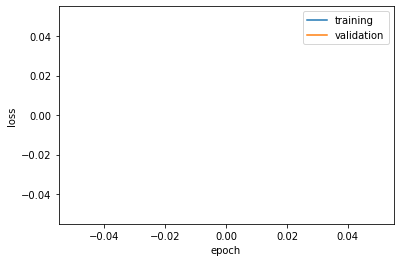

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

epoch_num = range(1,num_epoch +1)
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
plt.plot(epoch_num, training_loss)
plt.plot(epoch_num, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()